In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split

#import tensorflow as tf
#from tensorflow.compiler.tf2xla.python.xla import dynamic_update_slice
#from keras.src.backend.common import KerasVariable
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#import os


cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

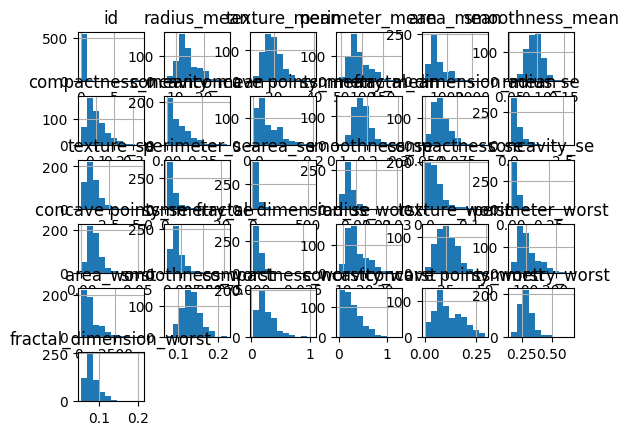

In [17]:
cancer_df.hist()

#### Analyze the Data
1. Which features are available in the dataset?
2. Which features are categorical?
3. Which features are numerical?
4. Which features are mixed data types?
5. Which features may contain errors or typos?
6. Which features contain blank, null, or empty values?
7. What are the data types for various features?
8. What is the distributuion of numerical feature values across the sampes?
9. What is the distrubution of categorical features?


#### Find Shape of Data

In [18]:
cancer_df.shape

(569, 32)


#### Data Cleaning

Use `cancer_df.isna().sum()` to look for missing value

In [19]:
cancer_df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### No Data Missing

### Which features are available in the dataset?
### Which features are categorical?
### Which features are numerical?
### Which features are mixed data types?

In [20]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Convert Non-Numerica data

In [21]:
le = LabelEncoder()
cancer_df.diagnosis = le.fit_transform(cancer_df.diagnosis)

### Find Correlation between Data

In [22]:
cancer_df.corr().diagnosis

id                         0.039769
diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0

### Drop ID Column

In [23]:
cancer_df.drop(columns='id', inplace=True)
cancer_df.shape

(569, 31)

### Model Training

In [24]:
X = cancer_df.drop(columns='diagnosis')
y = cancer_df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head
X_train.shape

(455, 30)

In [25]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [26]:
model = Sequential()
model.add(Input([len(X_train_sc[0, :])]))
model.add(Dense(12, activation='relu'))

In [27]:
model.add(Dense(9, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │           117 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523 (2.04 KB)

 Trainable params: 523 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

None


### Added Step of Checking the Learning Curves

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
callback_a = ModelCheckpoint(filepath='my_best_model.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)

callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

### Fit the Model to the Training Set

In [30]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test),
                    epochs=20, batch_size=10, callbacks=[callback_a, callback_b])

Epoch 1/20
 1/46 ━━━━━━━━━━━━━━━━━━━━ 16s 368ms/step - accuracy: 0.8000 - loss: 3.2361
Epoch 1: val_loss improved from inf to 6.17860, saving model to my_best_model.weights.h5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - loss: 5.5796 - val_accuracy: 0.6228 - val_loss: 6.1786
Epoch 2/20
 1/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 2: val_loss did not improve from 6.17860
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.5856 - loss: 6.6622 - val_accuracy: 0.6228 - val_loss: 6.1786
Epoch 3/20
 1/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9000 - loss: 1.6118
Epoch 3: val_loss did not improve from 6.17860
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.6374 - loss: 5.8451 - val_accuracy: 0.6228 - val_loss: 6.1786
Epoch 4/20
 1/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9000 - loss: 1.6118
Epoch 4: val_loss did not improve from 6.17860
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.6433 - loss: 5.7508 - val_a

In [31]:
print(history.params)

{'verbose': 'auto', 'epochs': 20, 'steps': 46}


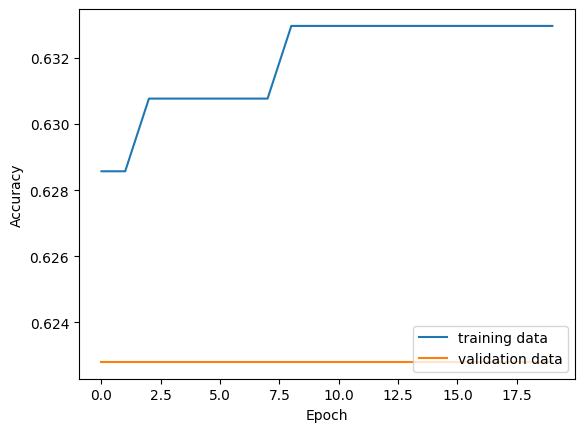

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [34]:
# TODO
#model.evaluate()